In [3]:
import pandas as pd
df = pd.read_csv('Unemployment in India.csv')
print(df.head())
df.dropna(inplace=True)




           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


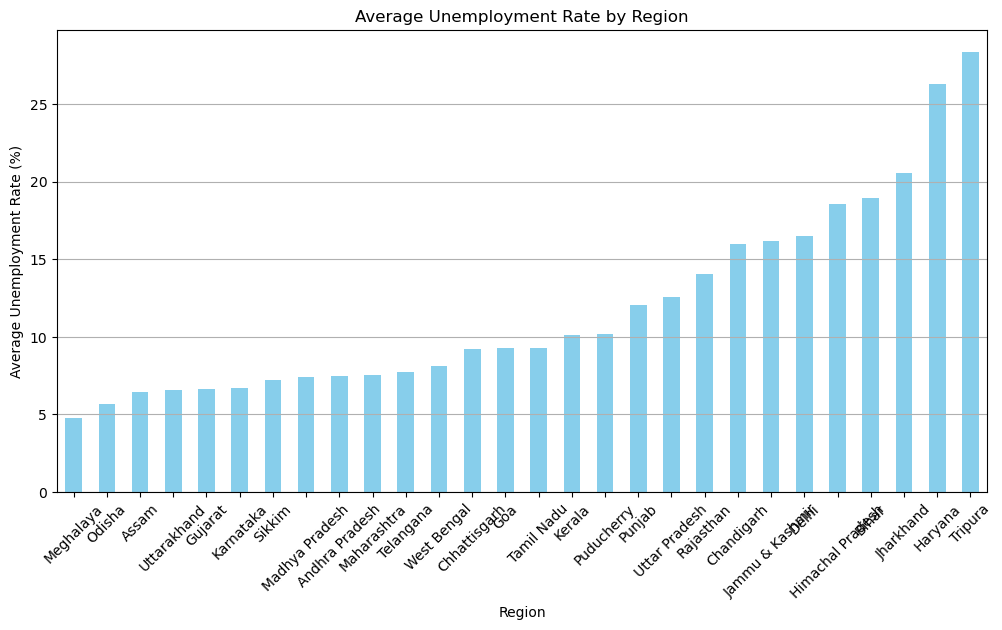

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Unemployment in India.csv')



df.columns = df.columns.str.strip()

df.dropna(inplace=True)

df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')

region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(12, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


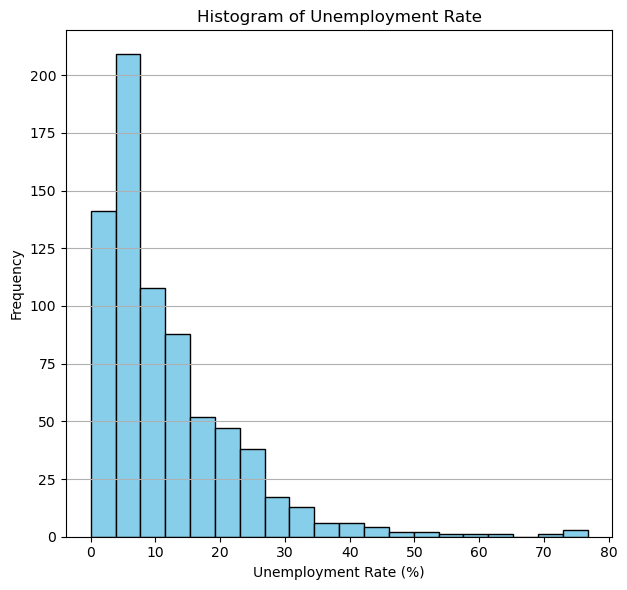

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Estimated Unemployment Rate (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('Unemployment in India.csv')
df.columns = df.columns.str.strip()
df.dropna(inplace=True)
df['Region'] = df['Region'].str.strip()

label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])

X = df[['Region', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df['Estimated Unemployment Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

print("Starting GridSearchCV...")
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Starting GridSearchCV...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Mean Absolute Error: 3.91
R² Score: 0.65


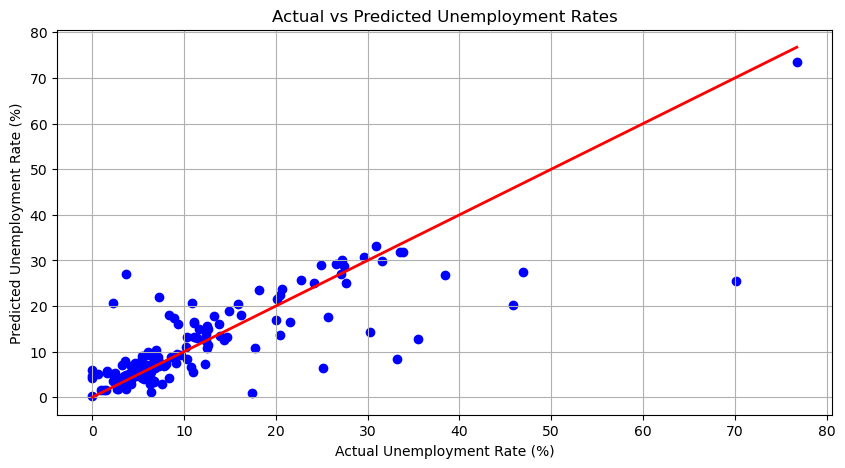

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title('Actual vs Predicted Unemployment Rates')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.grid()
plt.show()
